In [35]:
# imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# keys for Spotify Developer Authorization
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [37]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [38]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[2]

In [39]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [40]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [41]:
features = sp.audio_features(playlist_tracks_id)

In [42]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [43]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3Jalv7Q4CHeiHtdqgv5HVj,Hot Stuff,TOLEDO,[TOLEDO],0.545,0.775,1,-8.337,1,0.0996,0.162000,0.1120,0.765,160.006,209164,4
1,0AIpGG5dxEgnAymhdJRSZ0,Champagne Coast,Blood Orange,[Blood Orange],0.813,0.406,9,-12.626,1,0.0203,0.392000,0.0757,0.755,122.658,292373,4
2,5SOrrelhaVSfUtKgduNQ35,Shell,Valley Palace,[Valley Palace],0.568,0.712,9,-11.722,1,0.3180,0.760000,0.0651,0.321,150.056,207200,4
3,3nMWdZuB87f8wgzVY0CzlO,Again,Nice Guys,"[Nice Guys, Jaguar Sun]",0.651,0.614,7,-9.331,1,0.1740,0.709000,0.1040,0.608,97.836,227686,4
4,56mgbW81OVXwAgUsNkewPA,Spitting Blood,WU LYF,[WU LYF],0.366,0.741,2,-7.071,0,0.1940,0.000035,0.3330,0.141,131.734,227307,4


/home/craine/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TOLEDO'),
  Text(1, 0, 'Blood Orange'),
  Text(2, 0, 'Valley Palace'),
  Text(3, 0, 'Nice Guys'),
  Text(4, 0, 'WU LYF'),
  Text(5, 0, 'Widowspeak'),
  Text(6, 0, 'Willie J Healey'),
  Text(7, 0, 'Jaguar Sun'),
  Text(8, 0, 'Swiss Portrait'),
  Text(9, 0, 'Heather Woods Broderick'),
  Text(10, 0, 'Mikal Cronin'),
  Text(11, 0, 'Valley Maker'),
  Text(12, 0, 'Kurt Vile'),
  Text(13, 0, 'Day Wave'),
  Text(14, 0, 'LAUNDER'),
  Text(15, 0, 'peach tinted'),
  Text(16, 0, 'Cannons'),
  Text(17, 0, 'Sir Sly')])

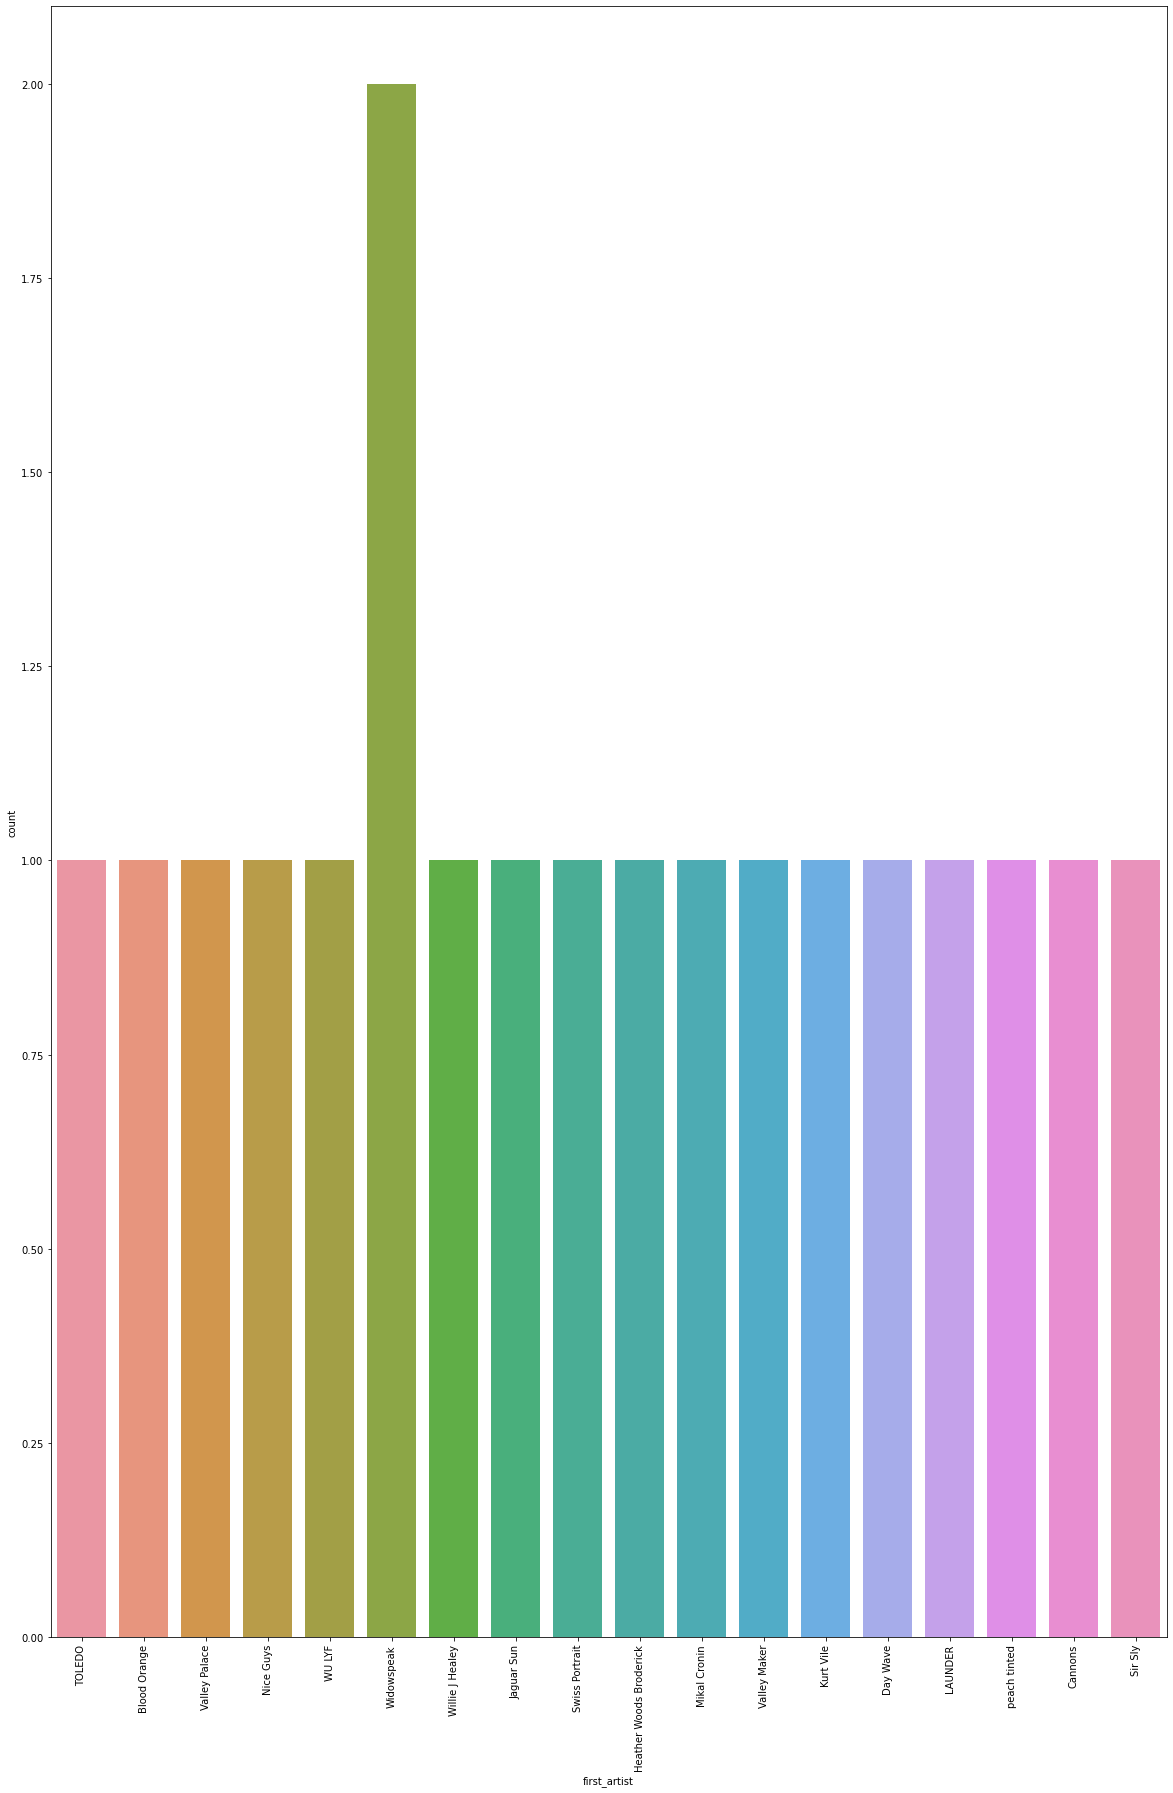

In [44]:
# Plotting
plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [ ]:
# Spotify Audio Analysis
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))